<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# MAT281 - Laboratorio N°08



<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1ZAicRye9Ixj7jijCwNhU8Fhf6Rmjp2Z7" width = "200" align="center"/>

El conjunto de datos se denomina `vehiculos_procesado_con_grupos.csv`, el cual contine algunas de las características más importante de un vehículo.

En este ejercicio se tiene como objetivo, es poder clasificar los distintos vehículos basados en las cracterísticas que se presentan a continuación. La dificultad de este ejercicio radíca en que ahora tenemos variables numéricas y variables categóricas.

Lo primero será cargar el conjunto de datos:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier
from sklearn.cluster import KMeans


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv("https://raw.githubusercontent.com/fralfaro/MAT281_2022/main/labs/lab_08/data/vehiculos_procesado_con_grupos.csv", sep=",")\
       .drop(
            ["fabricante",
             "modelo",
             "transmision",
             "traccion",
             "clase",
             "combustible",
             "consumo"],

          axis=1)

df.head()

,year,desplazamiento,cilindros,co2,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo,consumo_litros_milla
0,1984,2.5,4.0,522.764706,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.222671
1,1984,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
2,1985,2.5,4.0,555.437500,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto,0.236588
3,1985,4.2,6.0,683.615385,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto,0.291185
4,1987,3.8,6.0,555.437500,Coches Medianos,dos,Automatica,Premium,grande,alto,alto,0.236588


En este caso, no solo se tienen datos numéricos, sino que también categóricos. Además, tenemos problemas de datos **vacíos (Nan)**. Así que para resolver este problema, seguiremos varios pasos:

### 1.- Normalizar datos

1. Cree un conjunto de datos con las variables numéricas, además, para cada dato vacía, rellene con el promedio asociado a esa columna. Finalmente, normalize los datos mediante el procesamiento **MinMaxScaler** de **sklearn**.

2.-  Cree un conjunto de datos con las variables categóricas , además, transforme de variables categoricas a numericas ocupando el comando **get_dummies** de pandas ([referencia](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Explique a grande rasgo como se realiza la codificación de variables numéricas a categóricas.

3.- Junte ambos dataset en uno, llamado **df_procesado**.

In [3]:
# Creamos el conjunto de dato con variables numéricas
df.dtypes # Para ver qué valores son numéricos

year                      int64
desplazamiento          float64
cilindros               float64
co2                     float64
clase_tipo               object
traccion_tipo            object
transmision_tipo         object
combustible_tipo         object
tamano_motor_tipo        object
consumo_tipo             object
co2_tipo                 object
consumo_litros_milla    float64
dtype: object

In [4]:
#1. Creamos un dfnum que tiene los valores numericos quitando los que no son numéricos
dfnum=df.drop(["clase_tipo","traccion_tipo","transmision_tipo","combustible_tipo","tamano_motor_tipo","consumo_tipo","co2_tipo"],axis=1)
dfnum.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,2.5,4.0,522.764706,0.222671
1,1984,4.2,6.0,683.615385,0.291185
2,1985,2.5,4.0,555.437500,0.236588
3,1985,4.2,6.0,683.615385,0.291185
4,1987,3.8,6.0,555.437500,0.236588


In [5]:
#Contamos cuántos valores null hay en todo nuestro dfnum

yearnull=dfnum['year'].isna().sum()
print("yearnull:",yearnull)
desplazamientonull=dfnum['desplazamiento'].isna().sum()
print("desplazamientonull:",desplazamientonull)
cilindrosnull=dfnum['cilindros'].isna().sum()
print("cilindrosnull:", cilindrosnull)
co2null=dfnum['co2'].isna().sum()
print("co2null:",co2null)
consumolitronull=dfnum['consumo_litros_milla'].isna().sum()
print("consumonull:",consumolitronull)


yearnull: 0
desplazamientonull: 2
cilindrosnull: 3
co2null: 0
consumonull: 0


In [6]:
# Calculamos el promedio de el desplazamiento y el cilindro

prom_des=dfnum['desplazamiento'].mean(skipna = True)
prom_cil=dfnum['cilindros'].mean(skipna = True)

# Rellenamos  valores nulos con el promedio calculado

dfnum.fillna({'desplazamiento': prom_des}, inplace=True)
dfnum.fillna({'cilindros': prom_cil}, inplace=True)

# Escalamos con la función

scaler=MinMaxScaler()
colnum = ["desplazamiento", "cilindros", "co2", "consumo_litros_milla"]
dfnum[colnum] = scaler.fit_transform(dfnum[colnum])

dfnum.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla
0,1984,0.243590,0.142857,0.398014,0.331027
1,1984,0.461538,0.285714,0.527672,0.475113
2,1985,0.243590,0.142857,0.424351,0.360294
3,1985,0.461538,0.285714,0.527672,0.475113
4,1987,0.410256,0.285714,0.424351,0.360294


In [7]:
# Ahora crearemos un df con las variables categoricas
dfcat=df.drop(["year","desplazamiento","cilindros","co2","consumo_litros_milla"],axis=1)
dfcat.head()

,clase_tipo,traccion_tipo,transmision_tipo,combustible_tipo,tamano_motor_tipo,consumo_tipo,co2_tipo
0,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
1,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
2,Vehículos Especiales,dos,Automatica,Normal,pequeño,alto,alto
3,Vehículos Especiales,dos,Automatica,Normal,grande,muy alto,muy alto
4,Coches Medianos,dos,Automatica,Premium,grande,alto,alto


In [8]:
# Se usa get_dummies. Esta función crea un df con todas las clases de tipos
dfcatdum=pd.get_dummies(dfcat)
dfcatdum.head()

,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,clase_tipo_Deportivos,clase_tipo_Furgoneta,clase_tipo_Vehículos Especiales,traccion_tipo_cuatro,traccion_tipo_dos,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0


In [9]:
# Juntamos ambos df
df_procesado=pd.concat([dfnum,dfcatdum],axis=1)
df_procesado.head()

,year,desplazamiento,cilindros,co2,consumo_litros_milla,clase_tipo_Camionetas,clase_tipo_Coche Familiar,clase_tipo_Coches Grandes,clase_tipo_Coches Medianos,clase_tipo_Coches pequeños,...,consumo_tipo_alto,consumo_tipo_bajo,consumo_tipo_moderado,consumo_tipo_muy alto,consumo_tipo_muy bajo,co2_tipo_alto,co2_tipo_bajo,co2_tipo_moderado,co2_tipo_muy alto,co2_tipo_muy bajo
0,1984,0.243590,0.142857,0.398014,0.331027,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1984,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,1985,0.243590,0.142857,0.424351,0.360294,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,1985,0.461538,0.285714,0.527672,0.475113,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1987,0.410256,0.285714,0.424351,0.360294,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0


### 2.- Realizar ajuste mediante kmeans

Una vez depurado el conjunto de datos, es momento de aplicar el algoritmo de **kmeans**.

1. Ajuste el modelo de **kmeans** sobre el conjunto de datos, con un total de **8 clusters**.
2. Asociar a cada individuo el correspondiente cluster y calcular valor de los centroides de cada cluster.
3. Realizar un resumen de las principales cualidades de cada cluster. Para  esto debe calcular (para cluster) las siguientes medidas de resumen:
    * Valor promedio de las variables numérica
    * Moda para las variables numericas

In [16]:
#1. Ajustamos el modelo K-MEANS

X = np.array(df_procesado)
kmeans = KMeans(n_clusters=8,
                n_init=10,
                random_state=42)
kmeans.fit(X)

KMeans(n_init=10, random_state=42)

In [17]:
#2 Asociamos y calculamos centroides

centroids = kmeans.cluster_centers_
clusters = kmeans.labels_

#Etiquetar datos de los clusters encontrados
df_procesado["cluster"] = clusters
df_procesado["cluster"] = df_procesado["cluster"].astype('category')
centroids_df = pd.DataFrame(centroids)
centroids_df["cluster"] = [1,2,3,4,5,6,7,8]

In [18]:
# Describir los datos media
for i in range(0,8):
    print("Media Clusters", i+1)
    print(df_procesado[df_procesado['cluster']==i].drop(list(df_procesado.columns[5:],), axis=1).mean())
    print("")

Media Clusters 1
year                    1993.829778
desplazamiento             0.347004
cilindros                  0.262756
co2                        0.375696
consumo_litros_milla       0.304695
dtype: float64

Media Clusters 2
year                    2011.518931
desplazamiento             0.369496
cilindros                  0.282055
co2                        0.334626
consumo_litros_milla       0.260714
dtype: float64

Media Clusters 3
year                    1985.412470
desplazamiento             0.331892
cilindros                  0.244566
co2                        0.372419
consumo_litros_milla       0.297856
dtype: float64

Media Clusters 4
year                    2015.644925
desplazamiento             0.332534
cilindros                  0.262033
co2                        0.305551
consumo_litros_milla       0.229636
dtype: float64

Media Clusters 5
year                    2003.580142
desplazamiento             0.354574
cilindros                  0.280733
co2                    

In [19]:
# Describir datos moda
for i in range(0,8):
    print("Media Clusters", i+1)
    print(df_procesado[df_procesado['cluster']==i].drop(list(df_procesado.columns[5:],), axis=1).mode())
    print("")

Media Clusters 1
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0  1992        0.307692   0.142857  0.374603              0.305011

Media Clusters 2
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0  2013        0.179487   0.285714  0.317749               0.24183

Media Clusters 3
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0  1985        0.179487   0.142857  0.353657              0.281734

Media Clusters 4
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0  2015        0.179487   0.142857  0.256333               0.24183

Media Clusters 5
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0  2005        0.307692   0.285714  0.317749               0.24183

Media Clusters 6
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0  1989         0.24359   0.142857  0.374603              0.305011

Media Clusters 7
   year  desplazamiento  cilindros       co2  consumo_litros_milla
0  2

### 3.- Elegir Número de cluster

Estime mediante la **regla del codo**, el número de cluster apropiados para el caso.
Para efectos prácticos, eliga la siguiente secuencia como número de clusters a comparar:

$$[5, 10, 20, 30, 50, 75, 100, 200, 300]$$

Una vez realizado el gráfico, saque sus propias conclusiones del caso.

In [22]:
# Secuencia del número de clusters a comparar:
num_clusters = [5,10,20,30,50,75,100,200,300]

# Listas para almacenar las inercias:
inercia = []

for k in num_clusters:
  kmeans = KMeans(n_clusters=k,
                 n_init=10,
                 random_state=42
                 )
  kmeans.fit(df_procesado)
  inercia.append(kmeans.inertia_)

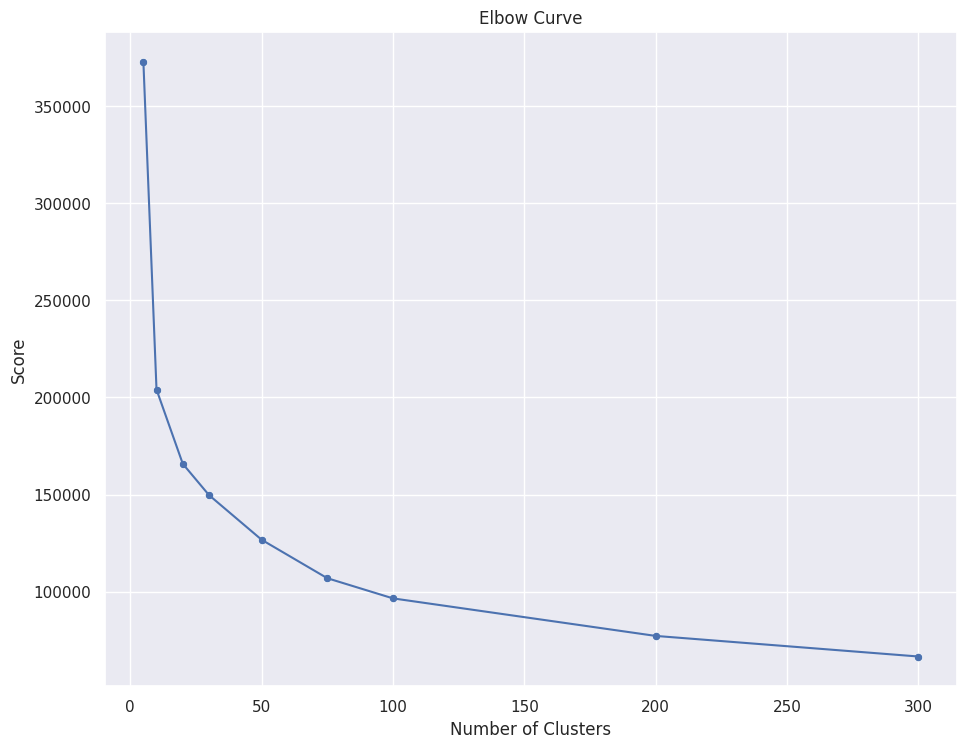

In [23]:
# graficamos los datos etiquetados con k-means
fig, ax = plt.subplots(figsize=(11, 8.5))
plt.title('Elbow Curve')
sns.lineplot(x="Number of Clusters",
             y="Score",
            data=df_Elbow)
sns.scatterplot(x="Number of Clusters",
             y="Score",
             data=df_Elbow)
plt.show()

Notamos que puede ser conveniente usar un valor que sea cercano a 100, ya que a partir de dicho valor comienza a estabilizarse.

## II.- Problema 02

<img src="https://live.staticflickr.com/7866/47075467621_85ab810139_c.jpg" align="center"/>

Para el conjunto de datos de **Iris**, se pide realizar una reducción de dimensionalidad ocupando las técnicas de PCA y TSNE (vistas en clases).



In [24]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [25]:
dataset = load_iris()

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target = 'species'
iris = pd.DataFrame(
    dataset.data,
    columns=features)

iris['species'] = dataset.target
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


El objetivo es aplicar ambos algoritmos de la siguiente manera:

* Análisis detallado algoritma PCA (tablas, gráficos, etc.)
* Análisis detallado algoritma TSNE (tablas, gráficos, etc.)
* Comparar ambos algoritmos (conclusiones del caso)

In [26]:
#ALGORITMO PCA LIBRERIAS
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [27]:
#ALGORITMO PCA
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(iris)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

pd.DataFrame(
    data    = modelo_pca.components_,
    columns = iris.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5']
)

,sepal_length,sepal_width,petal_length,petal_width,species
PC1,0.444863,-0.233369,0.506043,0.496894,0.494624
PC2,0.381980,0.920972,0.028717,0.070637,-0.009368
PC3,-0.750625,0.287249,-0.028337,0.385446,0.452414
PC4,-0.141201,-0.003513,0.243058,0.612583,-0.738725
PC5,0.269839,-0.121757,-0.826569,0.473583,0.069756


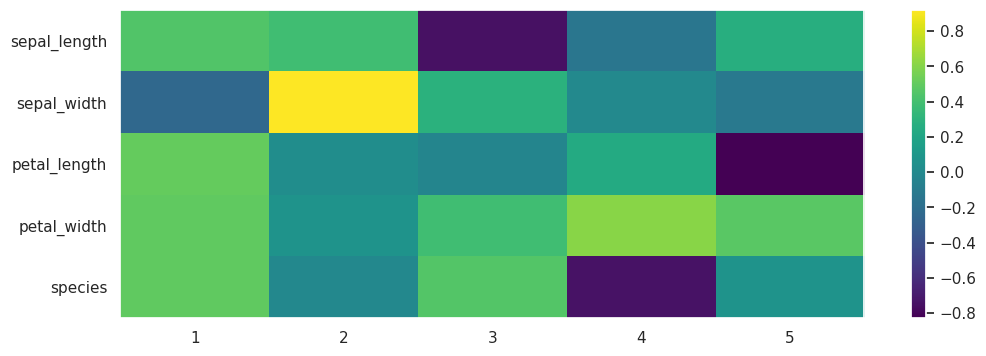

In [28]:
# Heatmap componentes
plt.figure(figsize=(12,4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(iris.columns)), iris.columns)
plt.xticks(range(len(iris.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

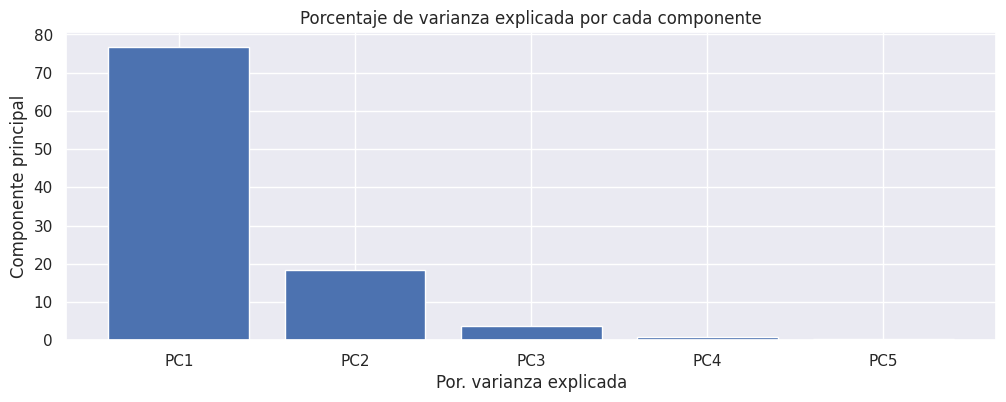

In [29]:
# varianza por componente
percent_variance = np.round(modelo_pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,6), height=percent_variance, tick_label=columns)
plt.xticks(np.arange(modelo_pca.n_components_) + 1)

plt.ylabel('Componente principal')
plt.xlabel('Por. varianza explicada')
plt.title('Porcentaje de varianza explicada por cada componente')
plt.show()

In [31]:
#PLOT PCA
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']

embedding = PCA(n_components=2)
X_transform = embedding.fit_transform(X)

df_pca = pd.DataFrame(X_transform,columns = ['Score1','Score2'])
df_pca['species'] = y

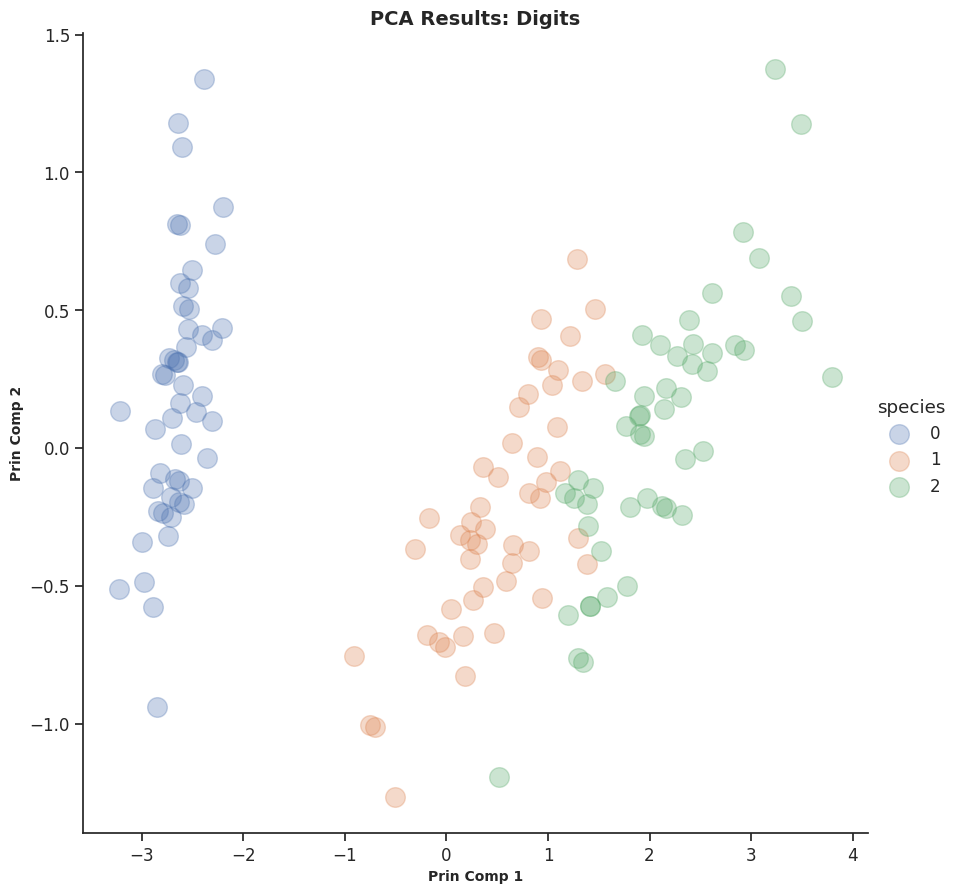

In [32]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
sns.lmplot(x='Score1',
           y='Score2',
           data=df_pca,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('PCA Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Prin Comp 1', weight='bold').set_fontsize('10')
plt.ylabel('Prin Comp 2', weight='bold').set_fontsize('10')

In [33]:
#ALGORITMO TSNE LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [34]:
#ALGORITMO TSNE
scaler = StandardScaler()

X = iris.drop(columns='species')
y = iris['species']

embedding = TSNE(n_components=2)
X_transform = embedding.fit_transform(X)

df_tsne = pd.DataFrame(X_transform,columns = ['_DIM_1_','_DIM_2_'])
df_tsne['species'] = y

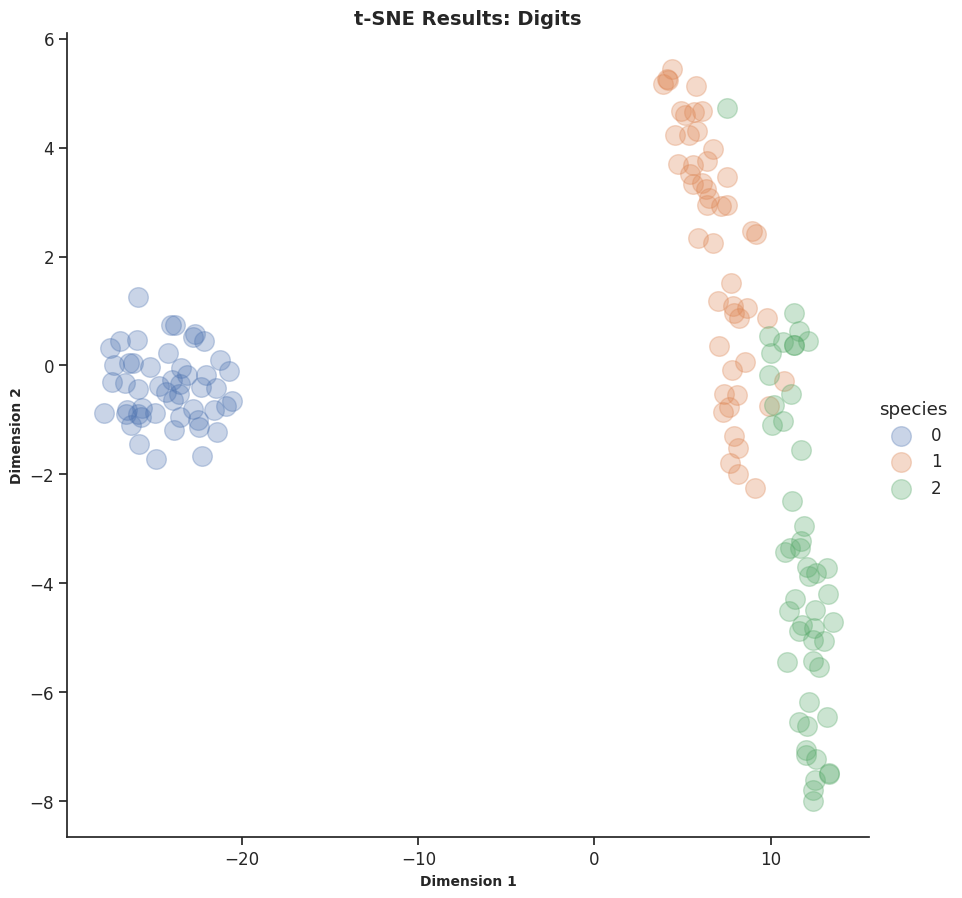

In [35]:
#PLOT TSNE
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

sns.lmplot(x='_DIM_1_',
           y='_DIM_2_',
           data=df_tsne,
           fit_reg=False,
           legend=True,
           height=9,
           hue='species',
           scatter_kws={"s":200, "alpha":0.3})

plt.title('t-SNE Results: Digits', weight='bold').set_fontsize('14')
plt.xlabel('Dimension 1', weight='bold').set_fontsize('10')
plt.ylabel('Dimension 2', weight='bold').set_fontsize('10')

Se observa claramente que ambos algoritmos crean una correcta separación de categorías, sin embargo TSNE separa de mejor manera los datos, observado en contraste con PCA.